<a href="https://colab.research.google.com/github/wlrma0108/Stand_Alone_Deeplearning/blob/main/Stand_Alone%233.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip3 install torch

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

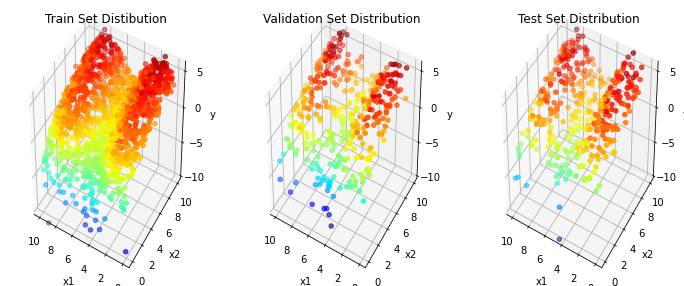

In [ ]:
from matplotlib import projections
num_data=2400
x1=np.random.rand(num_data)*10
x2=np.random.rand(num_data)*10
e=np.random.normal(0,0.5,num_data)
X=np.array([x1,x2]).T
y=2*np.sin(x1)+np.log(0.5*x2**2)+e

train_X,train_y=X[:1600,:],y[:1600]
val_x,val_y=X[1600:2000,:],y[1600:2000]
test_X,test_y=X[2000:,:],y[2000:]

fig=plt.figure(figsize=(12,5))
ax1=fig.add_subplot(1,3,1,projection='3d')
ax1.scatter(train_X[:,0],train_X[:,1],train_y,c=train_y,cmap='jet')

ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')
ax1.set_title('Train Set Distibution')
ax1.set_zlim(-10,6)
ax1.view_init(40,-60)
ax1.invert_xaxis()

ax2=fig.add_subplot(1,3,2,projection='3d')
ax2.scatter(val_x[:,0],val_x[:,1],val_y,c=val_y,cmap='jet')

ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('y')
ax2.set_title('Validation Set Distribution')
ax2.set_zlim(-10,6)
ax2.view_init(40,-60)
ax2.invert_xaxis()

ax3=fig.add_subplot(1,3,3,projection='3d')
ax3.scatter(test_X[:,0],test_X[:,1],test_y,c=test_y,cmap='jet')

ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('y')
ax3.set_title('Test Set Distribution')
ax3.set_zlim(-10,6)
ax3.view_init(40,-60)
ax3.invert_xaxis()

{} parameters 801


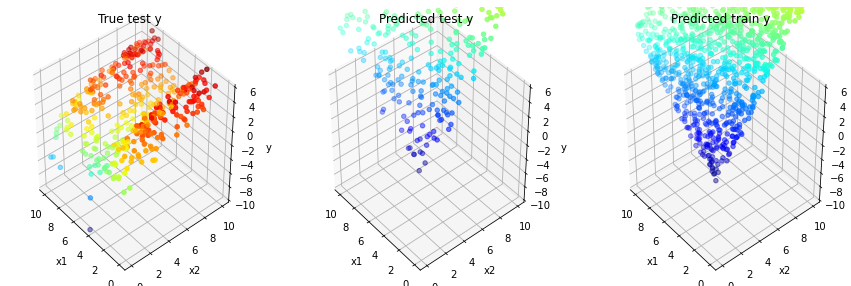

0 tensor(175.7766, grad_fn=<MseLossBackward0>)


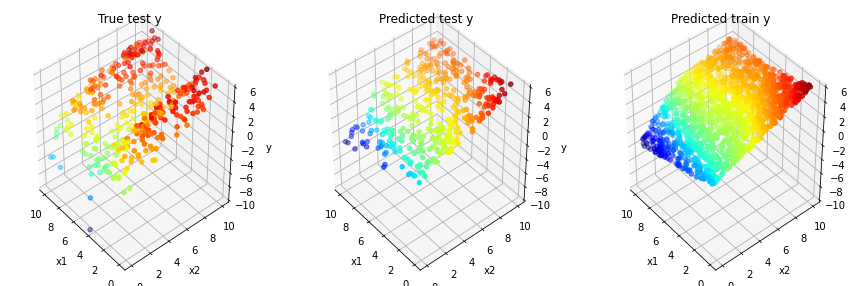

200 tensor(2.5322, grad_fn=<MseLossBackward0>)


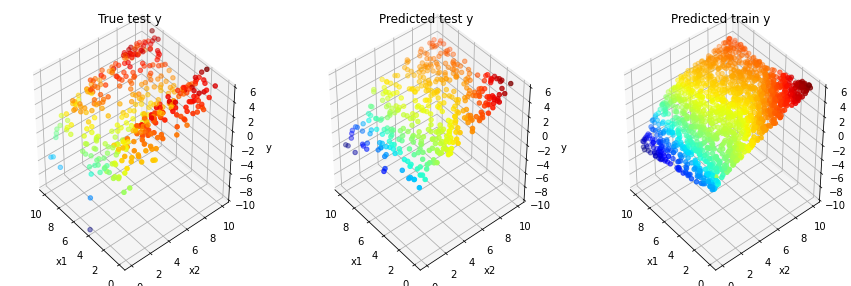

400 tensor(2.2612, grad_fn=<MseLossBackward0>)


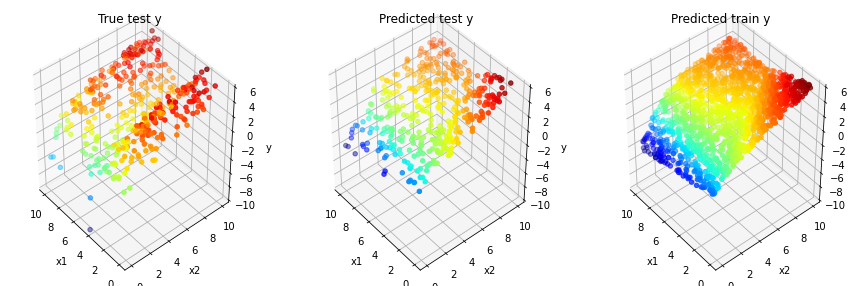

600 tensor(2.0980, grad_fn=<MseLossBackward0>)


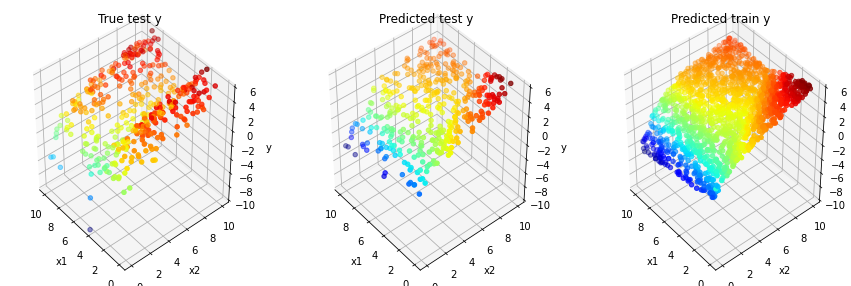

800 tensor(1.9896, grad_fn=<MseLossBackward0>)


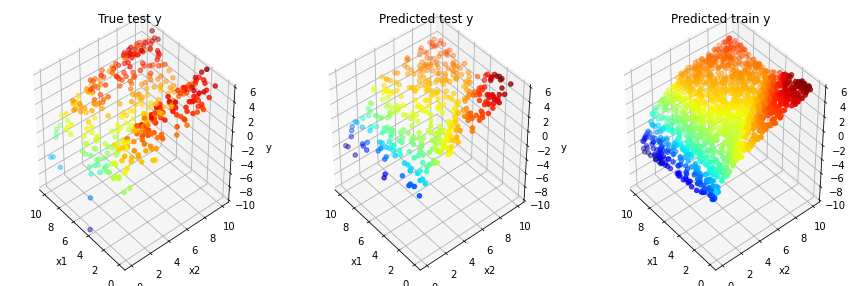

1000 tensor(1.9089, grad_fn=<MseLossBackward0>)


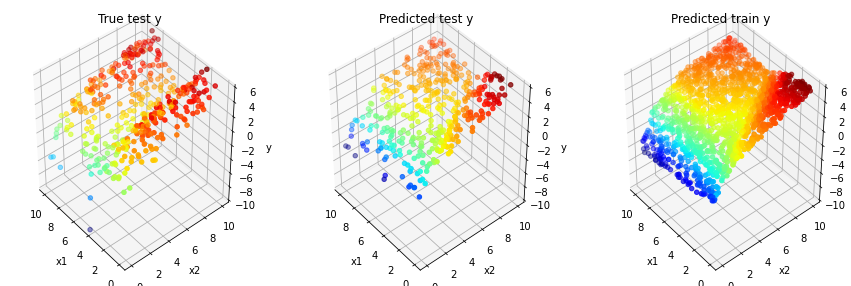

1200 tensor(1.8359, grad_fn=<MseLossBackward0>)


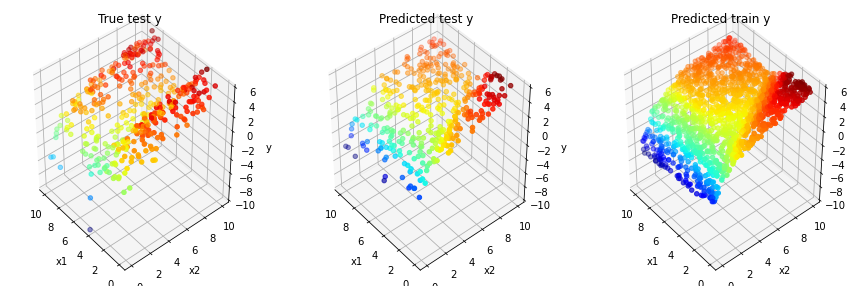

1400 tensor(1.7752, grad_fn=<MseLossBackward0>)


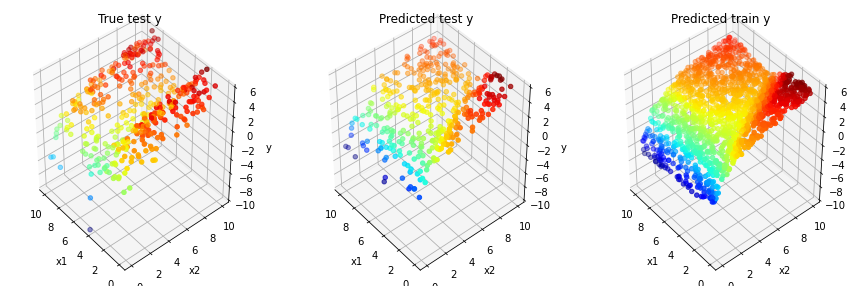

1600 tensor(1.7137, grad_fn=<MseLossBackward0>)


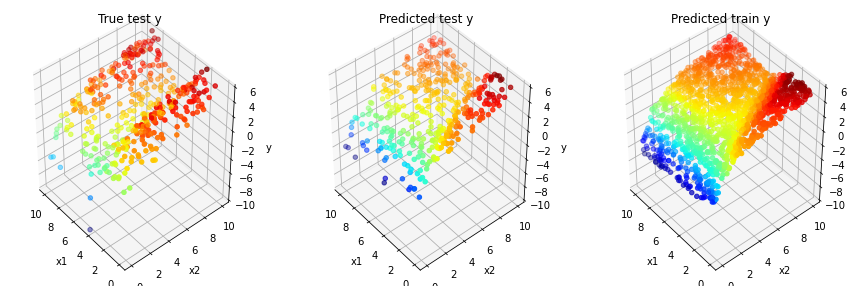

1800 tensor(1.6546, grad_fn=<MseLossBackward0>)


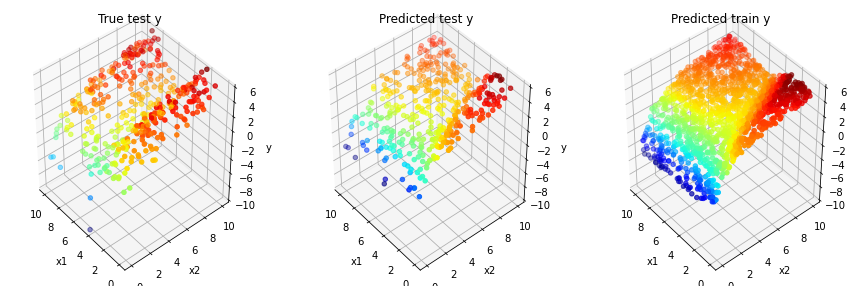

2000 tensor(1.5973, grad_fn=<MseLossBackward0>)


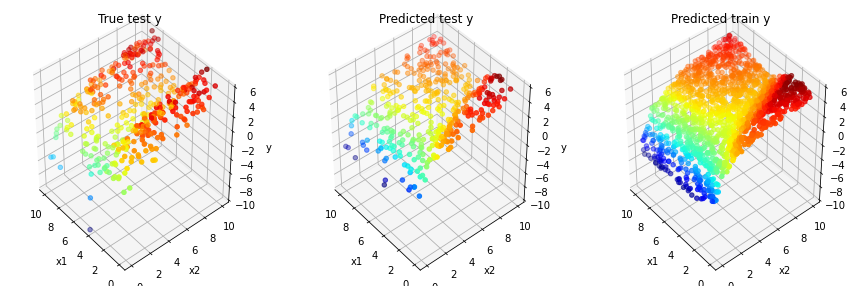

2200 tensor(1.5358, grad_fn=<MseLossBackward0>)


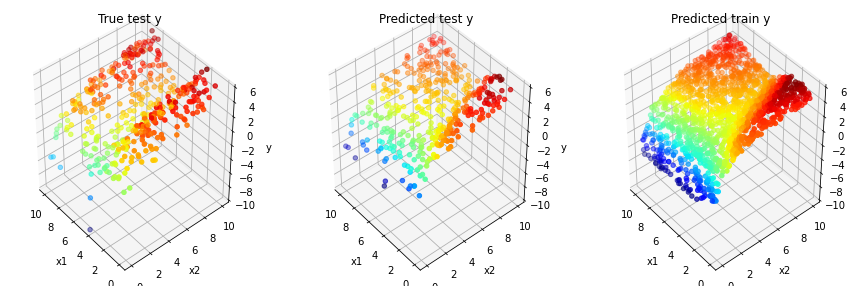

2400 tensor(1.4756, grad_fn=<MseLossBackward0>)


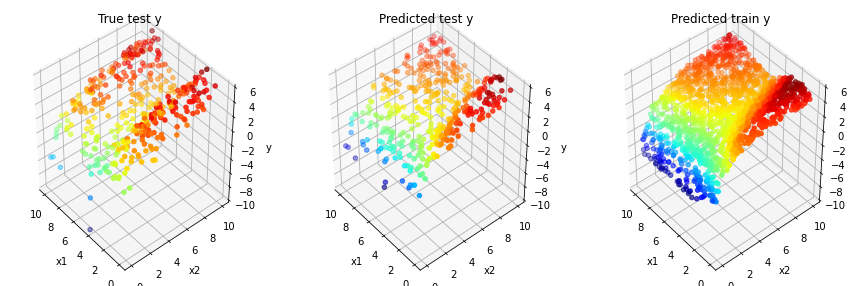

2600 tensor(1.4151, grad_fn=<MseLossBackward0>)


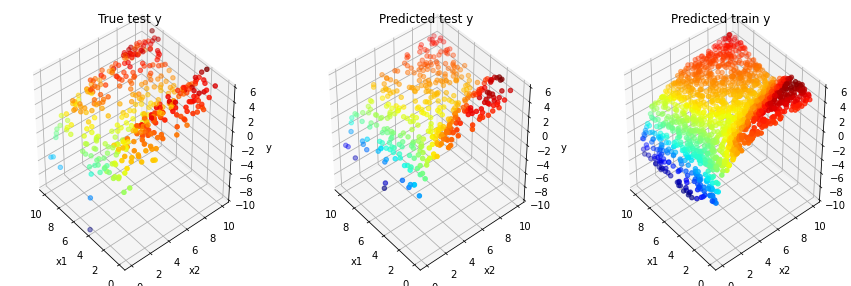

2800 tensor(1.3663, grad_fn=<MseLossBackward0>)


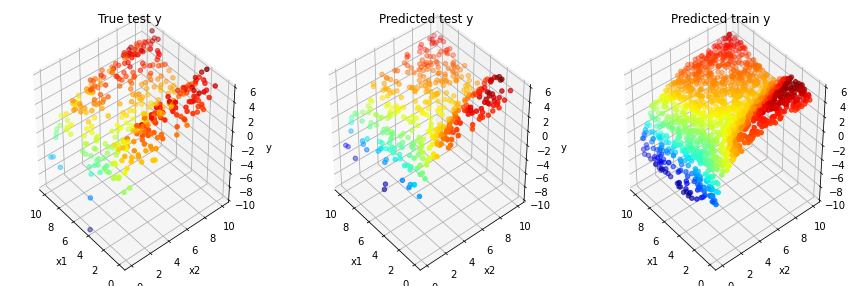

3000 tensor(1.3268, grad_fn=<MseLossBackward0>)


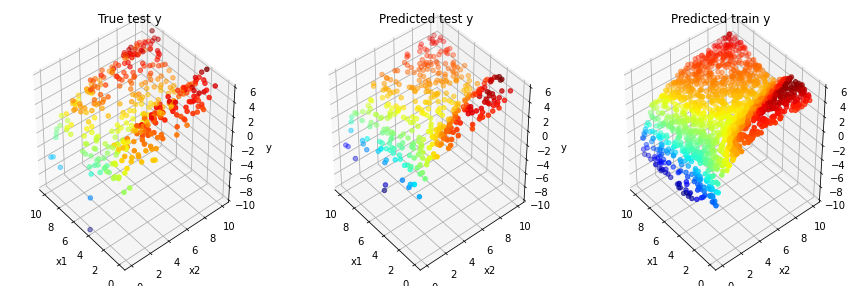

3200 tensor(1.2943, grad_fn=<MseLossBackward0>)


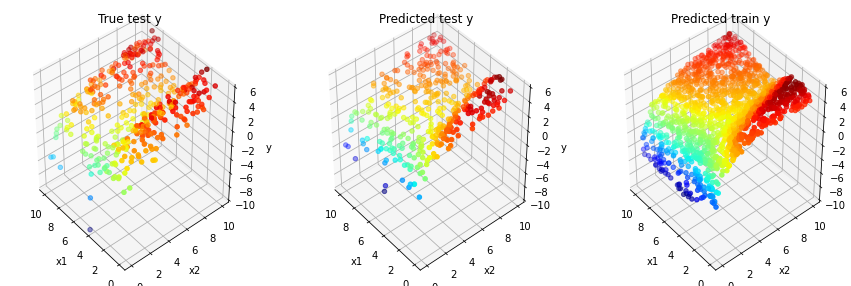

3400 tensor(1.2666, grad_fn=<MseLossBackward0>)


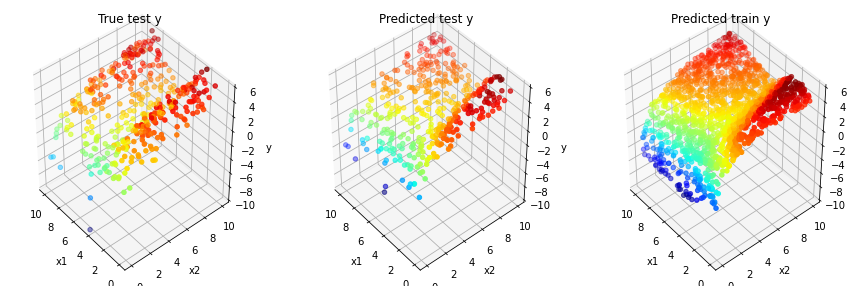

3600 tensor(1.2417, grad_fn=<MseLossBackward0>)


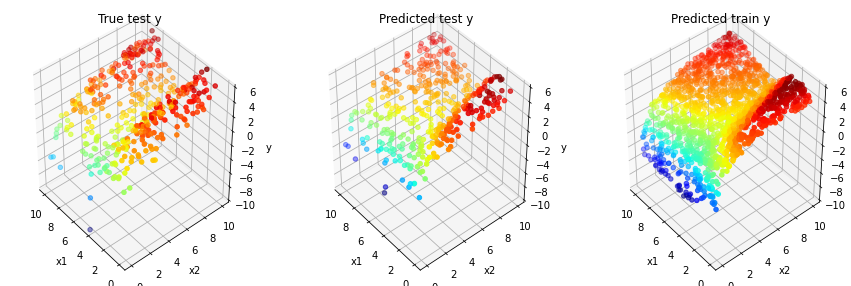

3800 tensor(1.2212, grad_fn=<MseLossBackward0>)


In [ ]:
import torch.optim as optim
from sklearn.metrics import mean_absolute_error
import torch
import torch.nn as nn

class LinearModel(nn.Module):
  def __init__(self): 
    super(LinearModel,self).__init__()
    self.linear=nn.Linear(in_features=2, out_features=1,bizs=True)


class MLPModel(nn.Module):
  def __init__(self):
    super(MLPModel,self).__init__()
    self.linear1=nn.Linear(in_features=2,out_features=200)
    self.linear2=nn.Linear(in_features=200,out_features=1)
    self.relu=nn.ReLU()

  def forward(self,x):
    x=self.linear1(x)
    x=self.relu(x)
    x=self.linear2(x)
    return x

reg_loss=nn.MSELoss()
model=MLPModel()
print('{} parameters', format(sum(p.numel() for p in model.parameters() if p.requires_grad)))
lr=0.005
optimizer=optim.SGD(model.parameters(),lr=lr)
list_epoch=[]
list_train_loss=[]
list_val_loss=[]
list_mae=[]
list_mae_epoch=[]

epoch=4000

for i in range(epoch):
  model.train()
  optimizer.zero_grad()
  input_x=torch.Tensor(train_X)
  true_y=torch.Tensor(train_y)
  pred_y=model(input_x)

  loss=reg_loss(pred_y.squeeze(),true_y)
  loss.backward()
  optimizer.step()
  list_epoch.append(i)
  list_train_loss.append(loss.detach().numpy())

  model.eval()
  optimizer.zero_grad()
  input_x=torch.Tensor(val_x)
  true_y=torch.Tensor(val_y)
  pred_y=model(input_x)
  loss=reg_loss(pred_y.squeeze(),true_y)
  list_val_loss.append(loss.detach().numpy())
  if i % 200 == 0:
        model.eval()
        optimizer.zero_grad()
        input_x = torch.Tensor(test_X)
        true_y = torch.Tensor(test_y)
        pred_y = model(input_x).detach().numpy() 
        mae = mean_absolute_error(true_y, pred_y) 
        list_mae.append(mae)
        list_mae_epoch.append(i)
        
        fig = plt.figure(figsize=(15,5))
        
        ax1 = fig.add_subplot(1, 3, 1, projection='3d')
        ax1.scatter(test_X[:, 0], test_X[:, 1], test_y, c=test_y, cmap='jet')
        
        ax1.set_xlabel('x1')
        ax1.set_ylabel('x2')
        ax1.set_zlabel('y')
        ax1.set_zlim(-10, 6)
        ax1.view_init(40, -40)
        ax1.set_title('True test y')
        ax1.invert_xaxis()

        ax2 = fig.add_subplot(1, 3, 2, projection='3d')
        ax2.scatter(test_X[:, 0], test_X[:, 1], pred_y, c=pred_y[:,0], cmap='jet')

        ax2.set_xlabel('x1')
        ax2.set_ylabel('x2')
        ax2.set_zlabel('y')
        ax2.set_zlim(-10, 6)
        ax2.view_init(40, -40)
        ax2.set_title('Predicted test y')
        ax2.invert_xaxis()

        input_x = torch.Tensor(train_X)
        pred_y = model(input_x).detach().numpy() 
        
        ax3 = fig.add_subplot(1, 3, 3, projection='3d')
        ax3.scatter(train_X[:, 0], train_X[:, 1], pred_y, c=pred_y[:,0], cmap='jet')

        ax3.set_xlabel('x1')
        ax3.set_ylabel('x2')
        ax3.set_zlabel('y')
        ax3.set_zlim(-10, 6)
        ax3.view_init(40, -40)
        ax3.set_title('Predicted train y')
        ax3.invert_xaxis()
        
        plt.show()
        print(i, loss)

Text(0.5, 1.0, 'epoch vs mae')

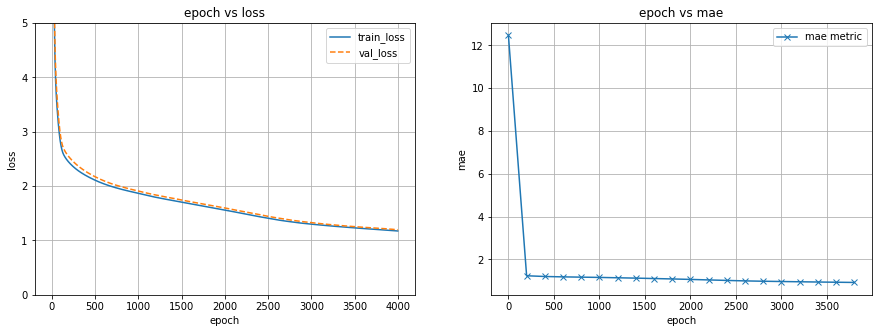

In [ ]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_ylim(0, 5)
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_mae_epoch, list_mae, marker='x', label='mae metric')

ax2.set_xlabel('epoch')
ax2.set_ylabel('mae')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs mae')



801 parameters


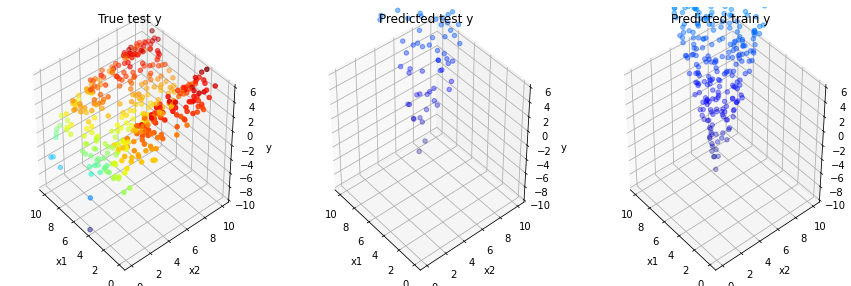

0 tensor(1086.5228, grad_fn=<MseLossBackward0>)


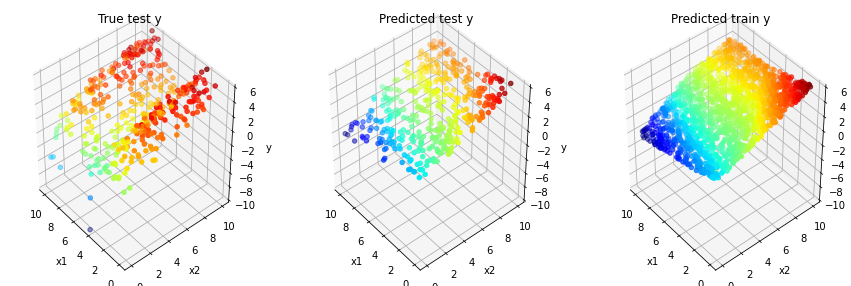

200 tensor(2.9086, grad_fn=<MseLossBackward0>)


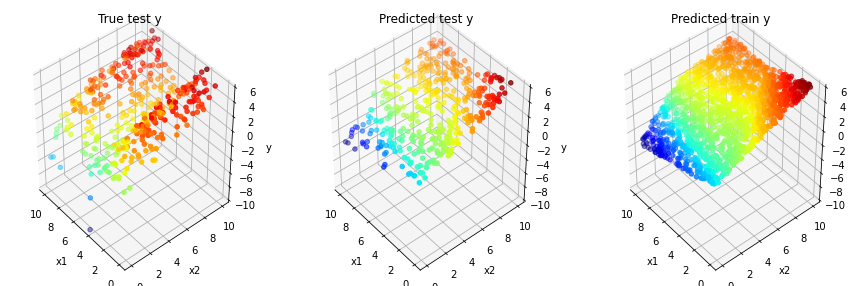

400 tensor(2.4921, grad_fn=<MseLossBackward0>)


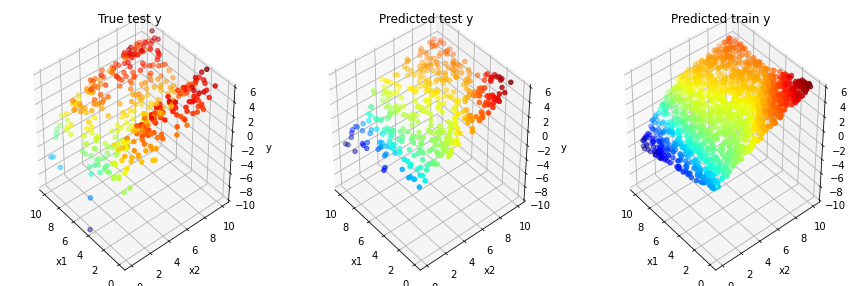

600 tensor(2.2827, grad_fn=<MseLossBackward0>)


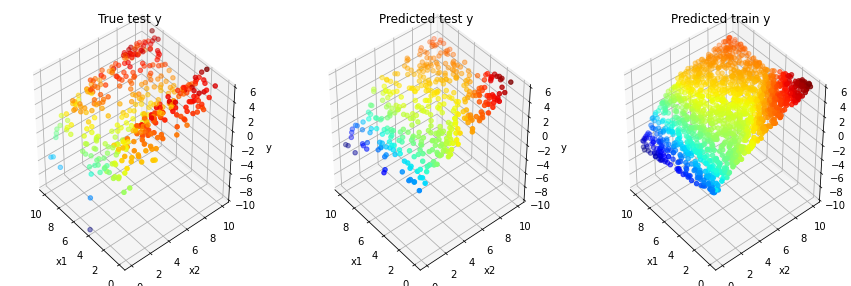

800 tensor(2.1492, grad_fn=<MseLossBackward0>)


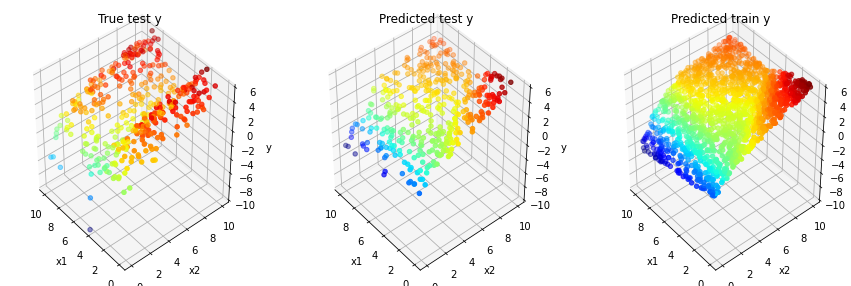

1000 tensor(2.0572, grad_fn=<MseLossBackward0>)


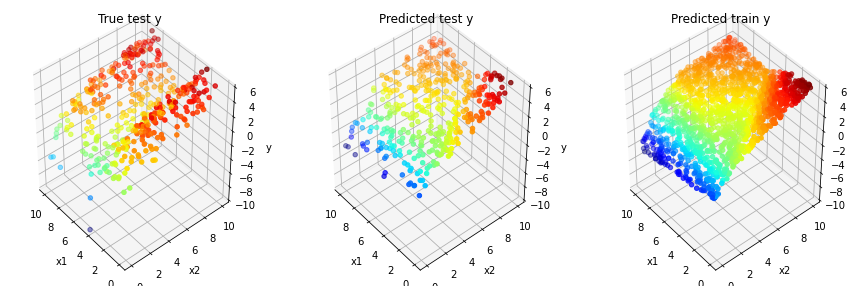

1200 tensor(1.9914, grad_fn=<MseLossBackward0>)


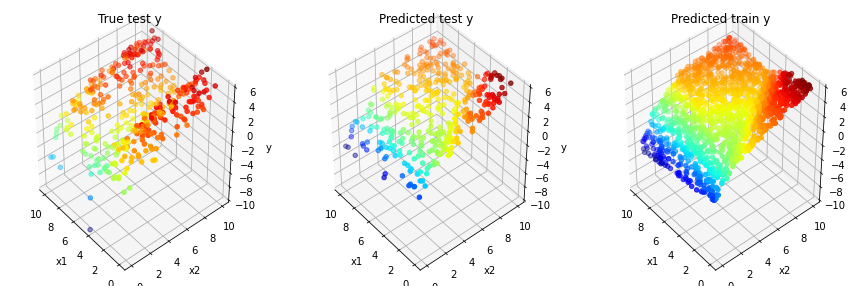

1400 tensor(1.9414, grad_fn=<MseLossBackward0>)


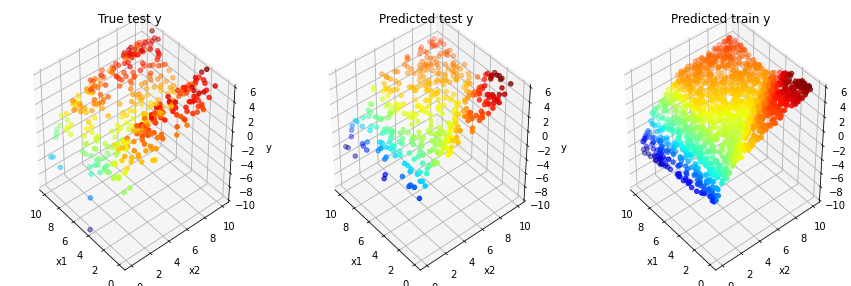

1600 tensor(1.8977, grad_fn=<MseLossBackward0>)


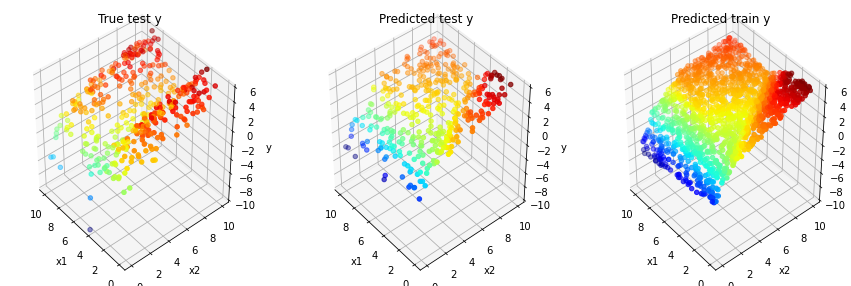

1800 tensor(1.8561, grad_fn=<MseLossBackward0>)


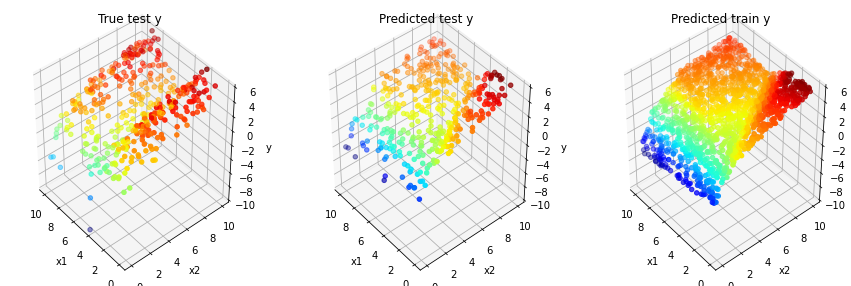

2000 tensor(1.8121, grad_fn=<MseLossBackward0>)


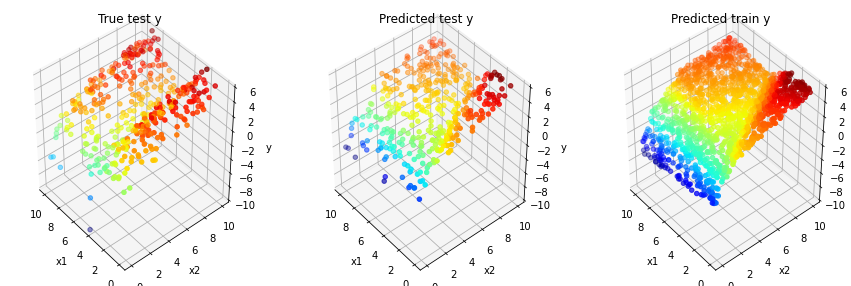

2200 tensor(1.7701, grad_fn=<MseLossBackward0>)


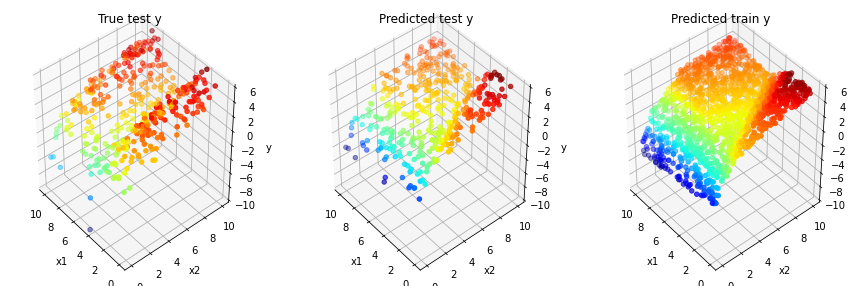

2400 tensor(1.7295, grad_fn=<MseLossBackward0>)


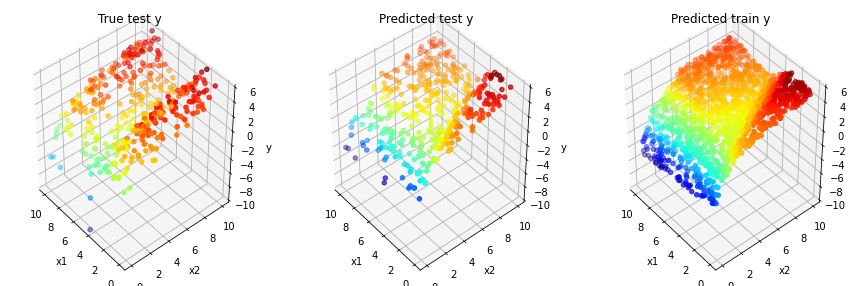

2600 tensor(1.6895, grad_fn=<MseLossBackward0>)


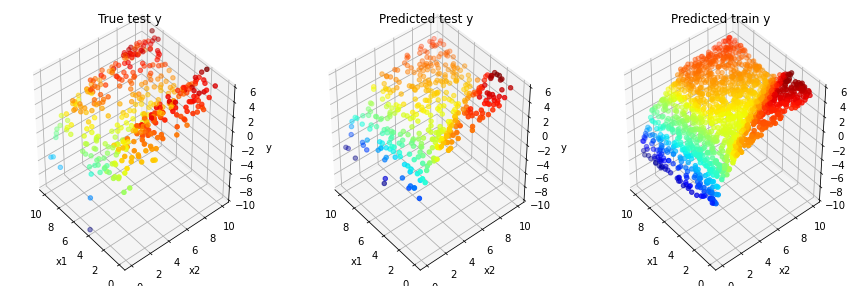

2800 tensor(1.6474, grad_fn=<MseLossBackward0>)


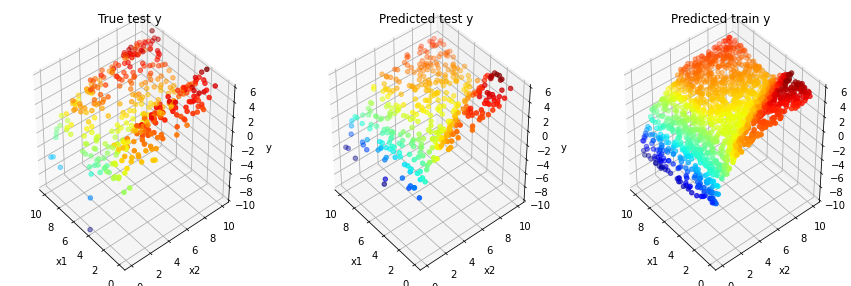

3000 tensor(1.6056, grad_fn=<MseLossBackward0>)


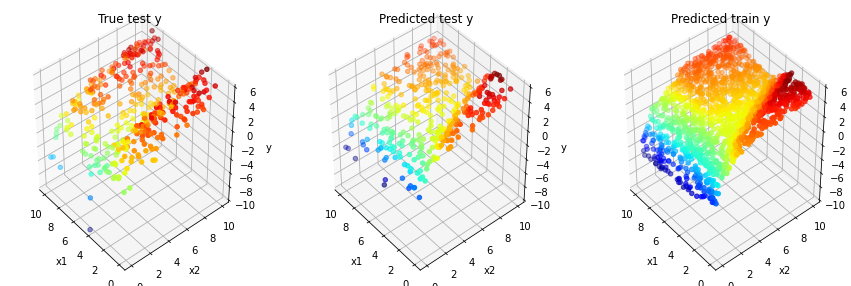

3200 tensor(1.5654, grad_fn=<MseLossBackward0>)


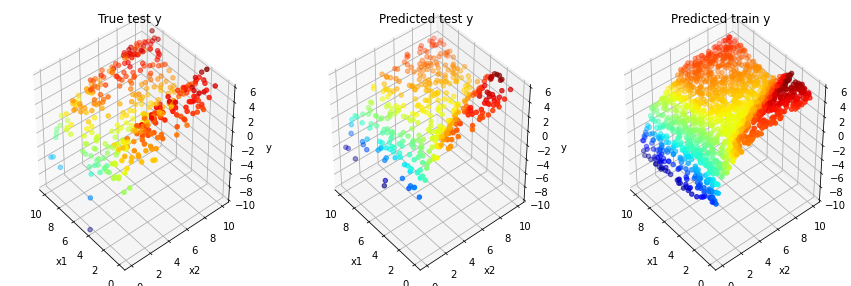

3400 tensor(1.5269, grad_fn=<MseLossBackward0>)


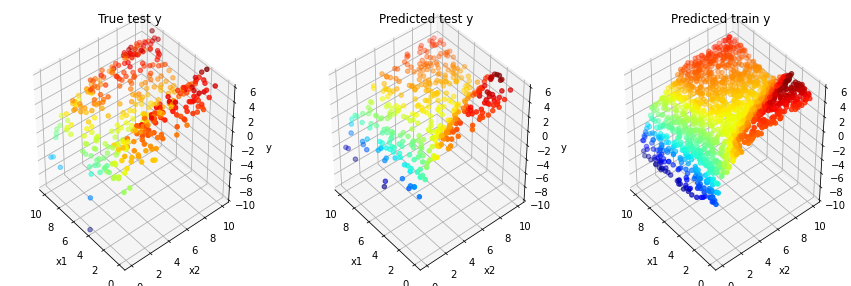

3600 tensor(1.4928, grad_fn=<MseLossBackward0>)


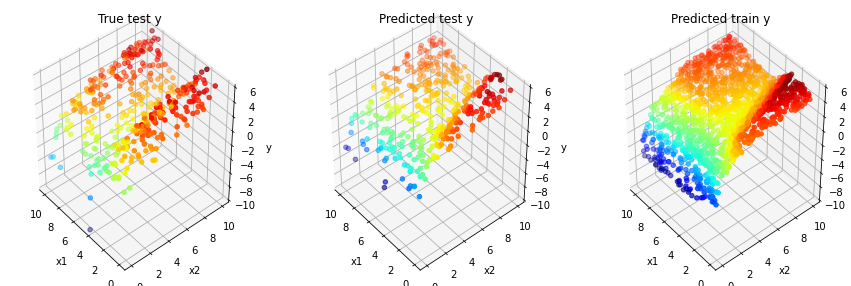

3800 tensor(1.4563, grad_fn=<MseLossBackward0>)


In [20]:
model=MLPModel()
print('{} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)))
lr=0.005
optimizer=optim.SGD(model.parameters(),lr=lr)
list_epoch=[]
list_train_loss=[]
list_val_loss=[]
list_mae=[]
list_mae_epoch=[]

epoch=4000

for i in range(epoch):
  model.train()
  optimizer.zero_grad()
  input_x=torch.Tensor(train_X)
  true_y=torch.Tensor(train_y)
  pred_y=model(input_x)

  loss=reg_loss(pred_y.squeeze(),true_y)
  loss.backward()
  optimizer.step()
  list_epoch.append(i)
  list_train_loss.append(loss.detach().numpy())

  model.eval()
  optimizer.zero_grad()
  input_x=torch.Tensor(val_x)
  true_y=torch.Tensor(val_y)
  pred_y=model(input_x)
  loss=reg_loss(pred_y.squeeze(),true_y)
  list_val_loss.append(loss.detach().numpy())
  if i % 200 == 0:
        model.eval()
        optimizer.zero_grad()
        input_x = torch.Tensor(test_X)
        true_y = torch.Tensor(test_y)
        pred_y = model(input_x).detach().numpy() 
        mae = mean_absolute_error(true_y, pred_y) 
        list_mae.append(mae)
        list_mae_epoch.append(i)
        
        fig = plt.figure(figsize=(15,5))
        
        ax1 = fig.add_subplot(1, 3, 1, projection='3d')
        ax1.scatter(test_X[:, 0], test_X[:, 1], test_y, c=test_y, cmap='jet')
        
        ax1.set_xlabel('x1')
        ax1.set_ylabel('x2')
        ax1.set_zlabel('y')
        ax1.set_zlim(-10, 6)
        ax1.view_init(40, -40)
        ax1.set_title('True test y')
        ax1.invert_xaxis()

        ax2 = fig.add_subplot(1, 3, 2, projection='3d')
        ax2.scatter(test_X[:, 0], test_X[:, 1], pred_y, c=pred_y[:,0], cmap='jet')

        ax2.set_xlabel('x1')
        ax2.set_ylabel('x2')
        ax2.set_zlabel('y')
        ax2.set_zlim(-10, 6)
        ax2.view_init(40, -40)
        ax2.set_title('Predicted test y')
        ax2.invert_xaxis()

        input_x = torch.Tensor(train_X)
        pred_y = model(input_x).detach().numpy() 
        
        ax3 = fig.add_subplot(1, 3, 3, projection='3d')
        ax3.scatter(train_X[:, 0], train_X[:, 1], pred_y, c=pred_y[:,0], cmap='jet')

        ax3.set_xlabel('x1')
        ax3.set_ylabel('x2')
        ax3.set_zlabel('y')
        ax3.set_zlim(-10, 6)
        ax3.view_init(40, -40)
        ax3.set_title('Predicted train y')
        ax3.invert_xaxis()
        
        plt.show()
        print(i, loss)

Text(0.5, 1.0, 'epoch vs mae')

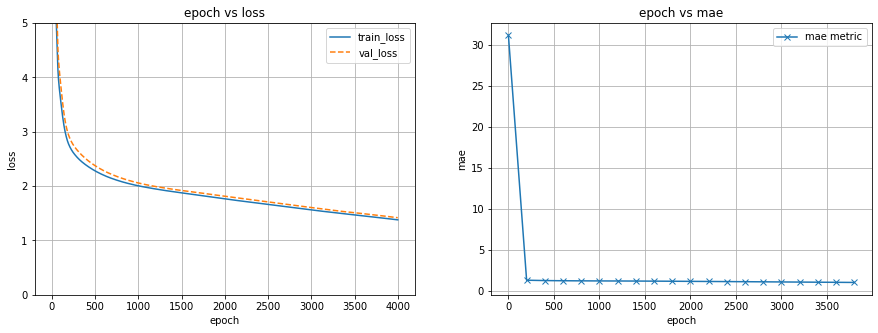

In [21]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_ylim(0, 5)
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_mae_epoch, list_mae, marker='x', label='mae metric')

ax2.set_xlabel('epoch')
ax2.set_ylabel('mae')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs mae')

